# Code First Girls Data Analysis Degree Project
## Review of Cryptocurrencies and digital assets

### Group 5 - Faitima Jeilani Ba-alawi, Helen Aughwan, Avu Harvey and Barbara Sheridan 


This project looks at how cryptocurrencies and NFTs have grown over time and how popular they have become.  We aim to determine how stable these are compared to other traditional markets and currencies. 

In [1]:
# Import required packages

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import mplfinance as mpl
import pandas_datareader as pdr
import seaborn as sns

### Question 1: How has the cryptocurrency market changed over time and how does this compare to the value of other currencies and traditional stocks?

# Data Gathering
Gather data for Bitcoin, XRP, Ethereum, Tether, GBP in USD and Dow Jones

In [64]:
#Create variables for yahoo finance API parameters. The period chosen corresponds with another CSV file with NFT values that we will be using for comparison.
start = '2018-06-01'
end = '2021-12-31'
interval = '1d'

In [65]:
#Gather adjusted close data for cryptocurrencies, GBP and Dow Jones Industrial.  Only the ‘Adjusted Close’ values were required for analysis. 

close_df= yf.download(['BTC-USD','ETH-USD', 'USDT-USD', 'XRP-USD', 'GBPUSD=X', 'DJI' ], start = start, end = end, interval = interval )['Adj Close']
close_df.head()

[*********************100%***********************]  6 of 6 completed


,BTC-USD,DJI,ETH-USD,GBPUSD=X,USDT-USD,XRP-USD
Date,,,,,,
2018-05-31,7494.169922,24415.800781,577.645020,NaN,0.998003,0.612622
2018-06-01,7541.450195,24635.199219,580.043030,1.328939,1.000990,0.623364
2018-06-02,7643.450195,NaN,591.807983,NaN,0.993530,0.643451
2018-06-03,7720.250000,NaN,618.328979,NaN,1.000100,0.671205
2018-06-04,7514.470215,24813.699219,592.984985,1.335648,1.000520,0.661425


In [66]:
#Rename columns for easier reference going forward.
close_df = close_df.rename(columns = {'BTC-USD':'bitcoin', 'DJI': 'dow_jones', 'ETH-USD':'ethereum', 'GBPUSD=X': 'GBP', 'USDT-USD':'tether', 'XRP-USD': 'XRP'}, inplace = False)
close_df.head(20)

,bitcoin,dow_jones,ethereum,GBP,tether,XRP
Date,,,,,,
2018-05-31,7494.169922,24415.800781,577.645020,NaN,0.998003,0.612622
2018-06-01,7541.450195,24635.199219,580.043030,1.328939,1.000990,0.623364
2018-06-02,7643.450195,NaN,591.807983,NaN,0.993530,0.643451
2018-06-03,7720.250000,NaN,618.328979,NaN,1.000100,0.671205
2018-06-04,7514.470215,24813.699219,592.984985,1.335648,1.000520,0.661425
2018-06-05,7633.759766,24800.000000,609.302979,1.331647,1.001020,0.677015
2018-06-06,7653.979980,25146.400391,607.124023,1.340608,1.000690,0.674797
2018-06-07,7678.240234,25241.400391,605.187012,1.342156,0.998750,0.678128
2018-06-08,7624.919922,25316.500000,601.077026,1.341922,1.001790,0.674343


Dow Jones and GBP seem to have missing values, possibly at weekends as commonly every 6th and 7th value, plus some others missing for Dow Jones. 

In [67]:
#getting an idea of the distriubution of the values
close_df.describe()

,bitcoin,dow_jones,ethereum,GBP,tether,XRP
count,1311.000000,732.000000,1311.000000,935.000000,1311.000000,1311.000000
mean,19374.224497,28647.887591,957.535778,1.310249,1.001742,0.470765
std,18472.435479,4180.998283,1258.499335,0.052125,0.005668,0.321729
min,3236.761719,18591.900391,84.308296,1.149439,0.966644,0.139635
25%,6793.227295,25413.449707,180.921371,1.275217,1.000050,0.256291
50%,9552.860352,27160.849609,269.431793,1.306336,1.000828,0.325475
75%,33772.007812,32885.100586,1503.901245,1.347255,1.003085,0.549782
max,67566.828125,36488.601562,4812.087402,1.422678,1.053585,1.839236


In [68]:
close_df.shape

(1311, 6)

# Checking data and cleaning

Checking data types and null values to see if any data may need further investigation or manipulation.

In [69]:
close_df.dtypes

bitcoin      float64
dow_jones    float64
ethereum     float64
GBP          float64
tether       float64
XRP          float64
dtype: object

In [70]:
#get a better understanding of numbers of NaN.
close_df.isna().sum()

bitcoin        0
dow_jones    579
ethereum       0
GBP          376
tether         0
XRP            0
dtype: int64

<AxesSubplot:xlabel='Date'>

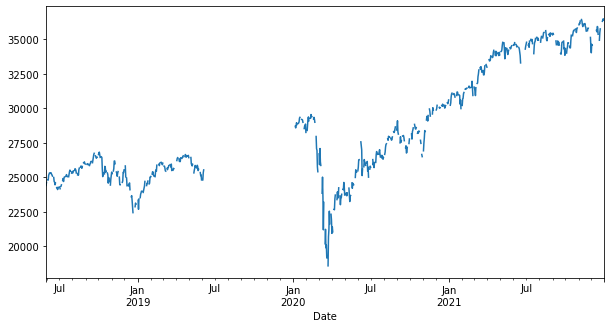

In [71]:
close_df['dow_jones'].plot(figsize=(10,5))

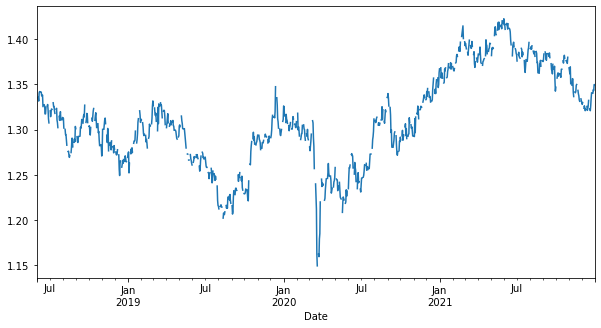

In [73]:
plot_2 = close_df['GBP'].plot(figsize=(10,5))

We have missing values for GBP and Dow Jones. A simple plot was done to view these NaN values to get an indication of what the NaN values might be. We could see from printing the head and tail of the data frame that GBP NaN values occurred every 6 and 7th value so it is likely weekend values are not recorded however the Dow Jones has multiple missing values including a gap between June 2019 and Dec 2019.

As we are doing time series comparisons it does not make sense to drop these values. Also, we cannot change them to 0 as this will affect the analysis. It was decided to fill the values with those between the corresponding values so we have an average value for the period.


In [74]:
close_df = close_df.interpolate()
close_df.isna().sum()

bitcoin      0
dow_jones    0
ethereum     0
GBP          1
tether       0
XRP          0
dtype: int64

In [76]:
#one left which is the first value so putting in a backfill.

close_df.fillna(method = 'bfill', inplace = True)
close_df.isna().sum()

bitcoin      0
dow_jones    0
ethereum     0
GBP          0
tether       0
XRP          0
dtype: int64

# Analysis


### How has cryptocurrency evolved?
Compare cryptocurrency values and compare growth using percentage change.

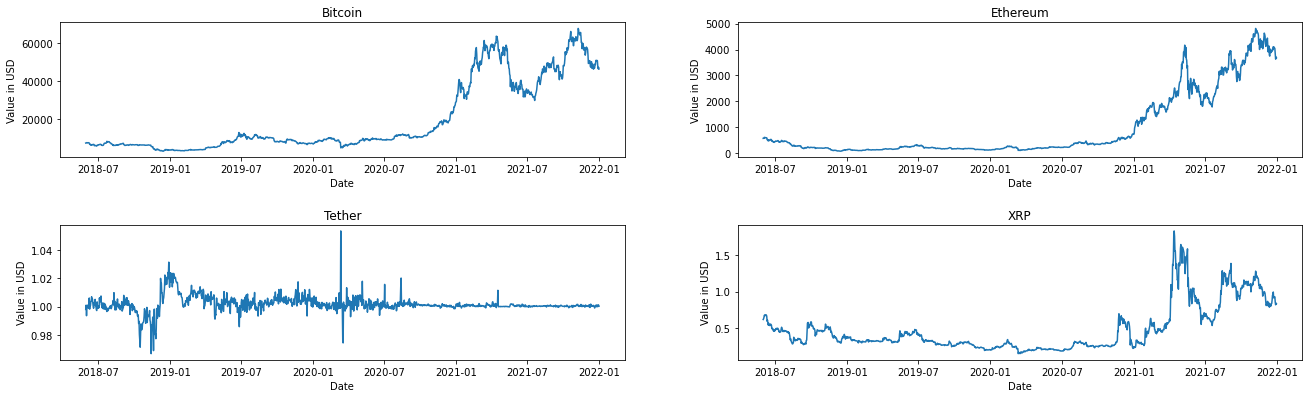

In [77]:
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)


ax1.plot(close_df['bitcoin'])
ax1.set_title("Bitcoin")
ax1.set_ylabel ('Value in USD')
ax1.set_xlabel ('Date')
ax2.plot(close_df['ethereum'])
ax2.set_title("Ethereum")
ax2.set_ylabel ('Value in USD')
ax2.set_xlabel ('Date')
ax3.plot(close_df['tether'])
ax3.set_title("Tether")
ax3.set_ylabel ('Value in USD')
ax3.set_xlabel ('Date')               
ax4.plot(close_df['XRP'])
ax4.set_title("XRP")
ax4.set_ylabel ('Value in USD')
ax4.set_xlabel ('Date')
plt.subplots_adjust(left = None, right = 3.0, top = 2.0, hspace = 0.5)
plt.show()

Bitcoin and Ethereum and XRP have had grown in a similar way particularly since January 2021 however bitcoins values is significantly higher.  XRP and Tether values are low in comparison and although XRP is starting to show similar growth like Bitcoin and Ethereum, Tethers values seems to be quite volatile up to approx Oct 2020 where it has remained quite level.

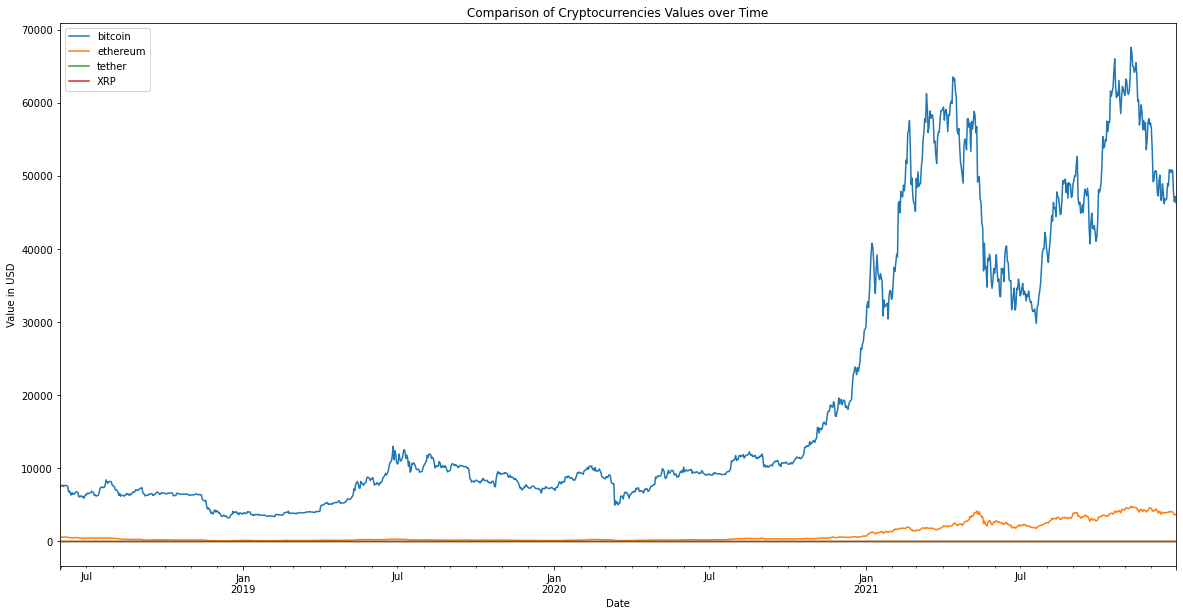

In [78]:
close_df[['bitcoin', 'ethereum', 'tether', 'XRP']].plot(figsize = (20,10))  

plt.title('Comparison of Cryptocurrencies Values over Time')
  
# # adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
#plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

## How does cryptocurrencies compare to other currencies and markets?

As Ethereum and Bitcoin are the largest, we used these to do similar comparison to GBP and Dow Jones.


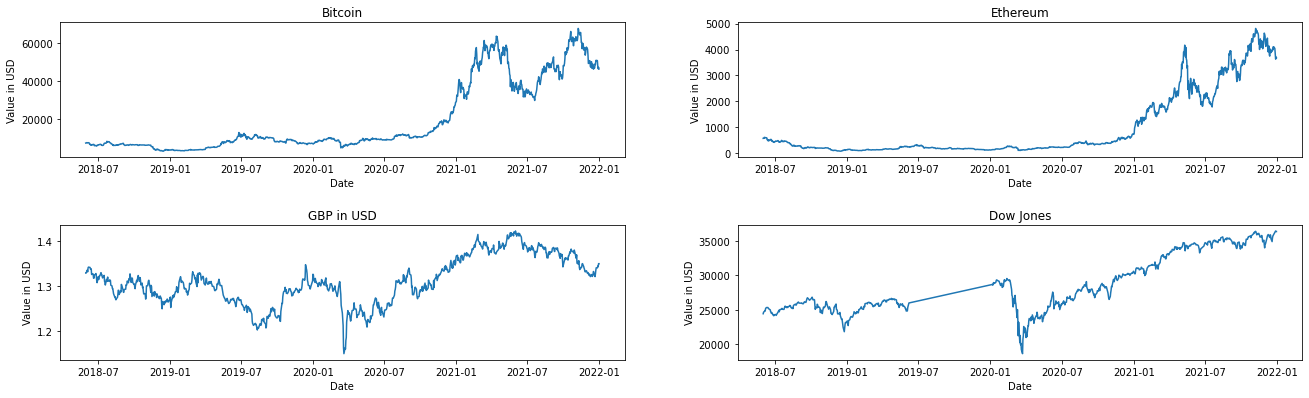

In [79]:
# create individual subplots first to see each value
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)


ax1.plot(close_df['bitcoin'])
ax1.set_title("Bitcoin")
ax1.set_ylabel ('Value in USD')
ax1.set_xlabel ('Date')
ax2.plot(close_df['ethereum'])
ax2.set_title("Ethereum")
ax2.set_ylabel ('Value in USD')
ax2.set_xlabel ('Date')
ax3.plot(close_df['GBP'])
ax3.set_title("GBP in USD")
ax3.set_ylabel ('Value in USD')
ax3.set_xlabel ('Date')               
ax4.plot(close_df['dow_jones'])
ax4.set_title("Dow Jones")
ax4.set_ylabel ('Value in USD')
ax4.set_xlabel ('Date')
plt.subplots_adjust(left = None, right = 3.0, top = 2.0, hspace = 0.5)
plt.show()

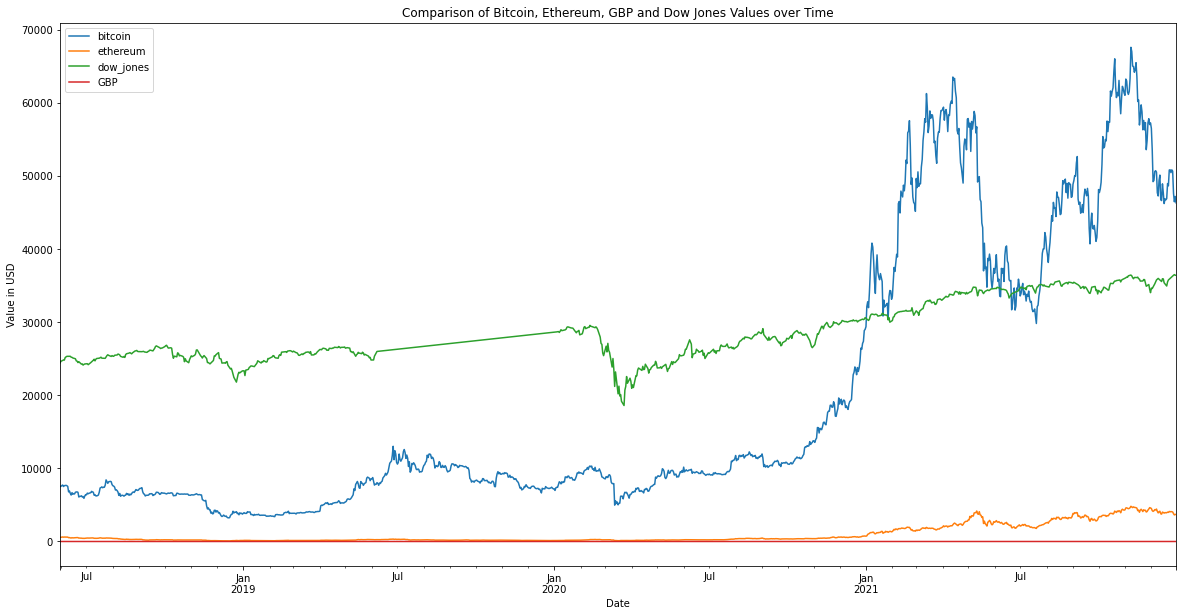

In [80]:
#plot together to allow better comparison

close_df[['bitcoin', 'ethereum', 'dow_jones', 'GBP']].plot(figsize = (20,10))  

plt.title('Comparison of Bitcoin, Ethereum, GBP and Dow Jones Values over Time')
  
# # adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
#plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

<AxesSubplot:>

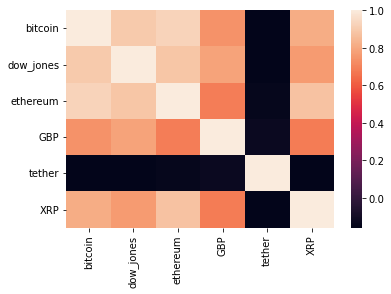

In [90]:
plt.figure(figsize=(6,4))
sns.heatmap(close_df.corr(),annot=False) 

# Percentage Change
Percentage chnage is commonly used to compare stock movement.  It allows better comaprison as it removes the inital value of the stock as a factor.

In [81]:
## calculate percetange change for all values
per_change= close_df.pct_change()
per_change.head()


,bitcoin,dow_jones,ethereum,GBP,tether,XRP
Date,,,,,,
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,0.006309,0.008986,0.004151,0.000000,0.002993,0.017534
2018-06-02,0.013525,0.002415,0.020283,0.001683,-0.007453,0.032224
2018-06-03,0.010048,0.002409,0.044814,0.001680,0.006613,0.043133
2018-06-04,-0.026655,0.002404,-0.040988,0.001677,0.000420,-0.014571


Compare percentage change in the histogram to see the distribution.

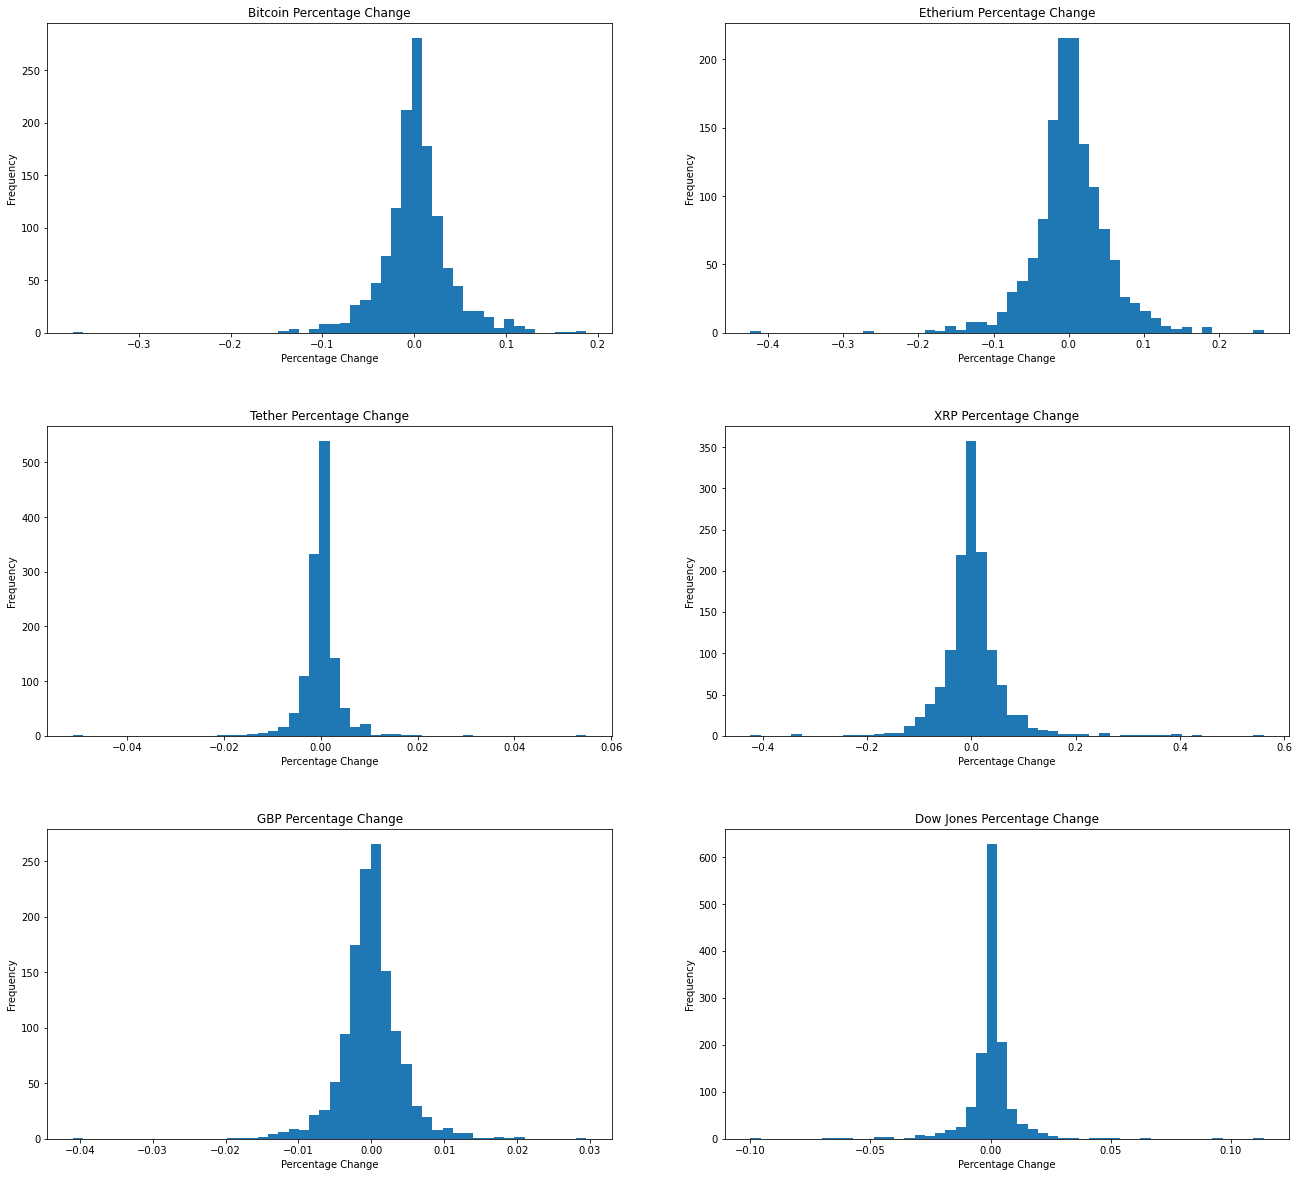

In [82]:

n = 50
fig = plt.figure()


ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.hist(per_change['bitcoin'], bins = n)
ax1.set_title("Bitcoin Percentage Change")
ax1.set_ylabel ('Frequency')
ax1.set_xlabel ('Percentage Change')
ax2.hist(per_change['ethereum'], bins = n)
ax2.set_title("Etherium Percentage Change")
ax2.set_ylabel ('Frequency')
ax2.set_xlabel ('Percentage Change')
ax3.hist(per_change['tether'], bins = n)
ax3.set_title("Tether Percentage Change")
ax3.set_ylabel ('Frequency')
ax3.set_xlabel ('Percentage Change')
ax4.hist(per_change['XRP'], bins = n)
ax4.set_title("XRP Percentage Change")
ax4.set_ylabel ('Frequency')
ax4.set_xlabel ('Percentage Change')
ax5.hist(per_change['GBP'], bins = n)
ax5.set_title("GBP Percentage Change")
ax5.set_ylabel ('Frequency')
ax5.set_xlabel ('Percentage Change')
ax6.hist(per_change['dow_jones'], bins = n)
ax6.set_title("Dow Jones Percentage Change")
ax6.set_ylabel ('Frequency')
ax6.set_xlabel ('Percentage Change')

plt.subplots_adjust(left = None, right = 3.0, top = 4.0, hspace = 0.3)
plt.show()

### Further exploratory analysis

In [83]:
per_change.describe()

,bitcoin,dow_jones,ethereum,GBP,tether,XRP
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,0.002123,0.000357,0.002679,0.000021,0.000010,0.002054
std,0.037883,0.010216,0.049681,0.004314,0.004165,0.061369
min,-0.371695,-0.099885,-0.423472,-0.040944,-0.051212,-0.423340
25%,-0.014326,-0.001674,-0.020065,-0.001937,-0.001123,-0.021408
50%,0.001394,0.000464,0.001484,-0.000052,-0.000048,-0.000787
75%,0.017850,0.003022,0.027508,0.001937,0.001082,0.020663
max,0.187465,0.113652,0.259475,0.029489,0.054845,0.560109


C:\Users\blshe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\blshe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\blshe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

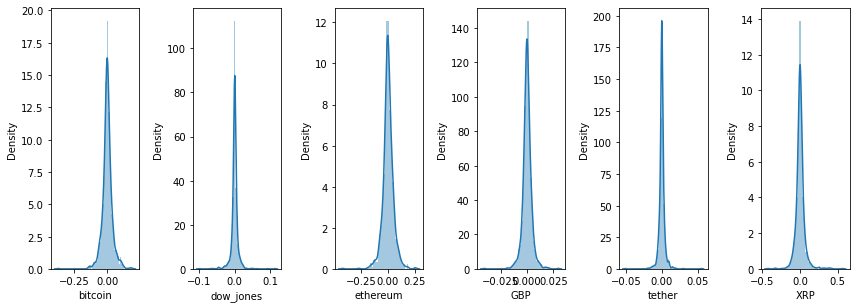

In [89]:
# Checking for skewed values

l = per_change.columns.values
number_of_columns=6
number_of_rows = int(len(l)-1/number_of_columns)

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(per_change[l[i]],kde=True) 
    plt.tight_layout()

<AxesSubplot:>

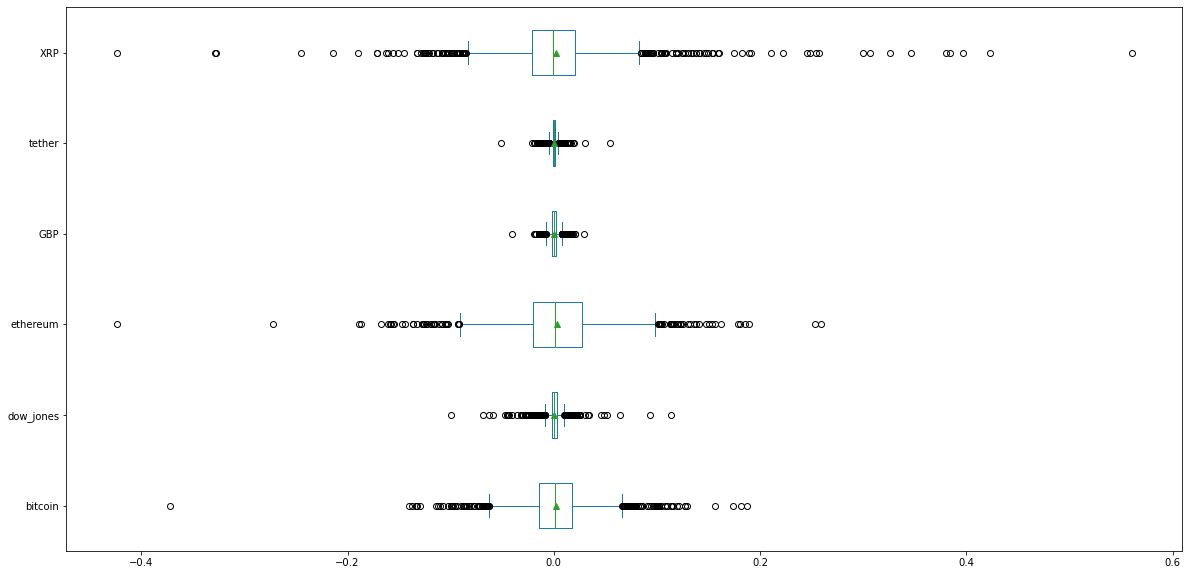

In [85]:
#Identify outliers using boxplot
                  
per_change.plot(kind = 'box',vert = False, showmeans = True, figsize = (20,10))                


In [86]:
# variance to identify how risky an investment is.  The higher the variance, the riskier the investment.
per_change.var()

bitcoin      0.001435
dow_jones    0.000104
ethereum     0.002468
GBP          0.000019
tether       0.000017
XRP          0.003766
dtype: float64

<AxesSubplot:>

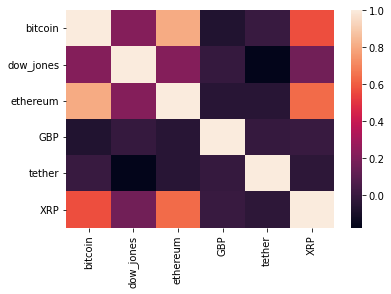

In [87]:
# heatmap to identify any corelation
plt.figure(figsize=(6,4))
sns.heatmap(per_change.corr(),annot=False) 

### reference material for doing nft and eth comparison

https://corporatefinanceinstitute.com/resources/knowledge/finance/covariance/